In [96]:
import pandas as pd
import requests
import pprint
from config import api_key

In [152]:
us_file = pd.read_csv("../Video_CSVs/USvideos.csv")
us_file.head()
gb_df = pd.read_csv("../Video_CSVs/GBvideos.csv")
gb_df.head()
CA_df = pd.read_csv("../Video_CSVs/CAvideos.csv")
CA_df.head()

video_id trending_date  \
0  n1WpP7iowLc      17.14.11   
1  0dBIkQ4Mz1M      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  d380meD0W0M      17.14.11   
4  2Vv-BfVoq4g      17.14.11   

                                               title channel_title  \
0         Eminem - Walk On Water (Audio) ft. Beyoncé    EminemVEVO   
1                      PLUSH - Bad Unboxing Fan Mail     iDubbbzTV   
2  Racist Superman | Rudy Mancuso, King Bach & Le...  Rudy Mancuso   
3                           I Dare You: GOING BALD!?      nigahiga   
4        Ed Sheeran - Perfect (Official Music Video)    Ed Sheeran   

   category_id              publish_time  \
0           10  2017-11-10T17:00:03.000Z   
1           23  2017-11-13T17:00:00.000Z   
2           23  2017-11-12T19:05:24.000Z   
3           24  2017-11-12T18:01:41.000Z   
4           10  2017-11-09T11:04:14.000Z   

                                                tags     views    likes  \
0  Eminem|"Walk"|"On"|"Water"|"Aftermath/Shady/In...  17158579   787425   
1  plush|"bad unboxing"|"unboxing"|"fan mail"|"id...   1014651   127794   
2  racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434   146035   
3  ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095828   132239   
4  edsheeran|"ed sheeran"|"acoustic"|"live"|"cove...  33523622  1634130   

   dislikes  comment_count                                  thumbnail_link  \
0     43420         125882  https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg   
1      1688          13030  https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg   
2      5339           8181  https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg   
3      1989          17518  https://i.ytimg.com/vi/d380meD0W0M/default.jpg   
4     21082          85067  https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Eminem's new track Walk on Water ft. Beyoncé i...  
1  STill got a lot of packages. Probably will las...  
2  WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...  
3  I know it's been a while since we did this sho...  
4  🎧: https://ad.gt/yt-perfect\n💰: https://atlant...

In [153]:
# get api data to add category names
params = {"part":"snippet","regionCode":"US",
           "key":api_key}
base_url= "https://www.googleapis.com/youtube/v3/videoCategories"
response = requests.get(base_url, params=params).json()
response
id_list = []
title_list = []
for i in response['items']:
    #print(i)
    id_list.append(i['id'])
    title_list.append(i['snippet']['title'])
new_df=pd.DataFrame({"category_id":id_list,"title_list":title_list})
new_df["category_id"]=new_df["category_id"].astype("int64")
new_df.dtypes
# Merge with us_df
CA_df=pd.merge(CA_df,new_df,on='category_id',how="left")
CA_df.drop(columns=["publish_time","tags","thumbnail_link","comments_disabled","ratings_disabled","video_error_or_removed","description"],inplace=True)
CA_df
# Merge with gb_df
gb_df=pd.merge(gb_df,new_df,on='category_id',how="left")
gb_df.drop(columns=["publish_time","tags","thumbnail_link","comments_disabled","ratings_disabled",
                    "video_error_or_removed","description",'category_id'],inplace=True)
gb_df

# Merge with us_df
us_df=pd.merge(us_file,new_df,on='category_id',how="left")
us_df

video_id trending_date  \
0      2kyS6SvSYSE      17.14.11   
1      1ZAPwfrtAFY      17.14.11   
2      5qpjK5DgCt4      17.14.11   
3      puqaWrEC7tY      17.14.11   
4      d380meD0W0M      17.14.11   
...            ...           ...   
40944  BZt0qjTWNhw      18.14.06   
40945  1h7KV2sjUWY      18.14.06   
40946  D6Oy4LfoqsU      18.14.06   
40947  oV0zkMe1K8s      18.14.06   
40948  ooyjaVdt-jA      18.14.06   

                                                   title  \
0                     WE WANT TO TALK ABOUT OUR MARRIAGE   
1      The Trump Presidency: Last Week Tonight with J...   
2      Racist Superman | Rudy Mancuso, King Bach & Le...   
3                       Nickelback Lyrics: Real or Fake?   
4                               I Dare You: GOING BALD!?   
...                                                  ...   
40944                       The Cat Who Caught the Laser   
40945                         True Facts : Ant Mutualism   
40946  I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...   
40947                How Black Panther Should Have Ended   
40948  Official Call of Duty®: Black Ops 4 — Multipla...   

                  channel_title  category_id              publish_time  \
0                  CaseyNeistat           22  2017-11-13T17:13:01.000Z   
1               LastWeekTonight           24  2017-11-13T07:30:00.000Z   
2                  Rudy Mancuso           23  2017-11-12T19:05:24.000Z   
3         Good Mythical Morning           24  2017-11-13T11:00:04.000Z   
4                      nigahiga           24  2017-11-12T18:01:41.000Z   
...                         ...          ...                       ...   
40944             AaronsAnimals           15  2018-05-18T13:00:04.000Z   
40945                  zefrank1           22  2018-05-18T01:00:06.000Z   
40946                Brad Mondo           24  2018-05-18T17:34:22.000Z   
40947  How It Should Have Ended            1  2018-05-17T17:00:04.000Z   
40948              Call of Duty           20  2018-05-17T17:09:38.000Z   

                                                    tags     views   likes  \
0                                        SHANtell martin    748374   57527   
1      last week tonight trump presidency|"last week ...   2418783   97185   
2      racist superman|"rudy"|"mancuso"|"king"|"bach"...   3191434  146033   
3      rhett and link|"gmm"|"good mythical morning"|"...    343168   10172   
4      ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...   2095731  132235   
...                                                  ...       ...     ...   
40944  aarons animals|"aarons"|"animals"|"cat"|"cats"...   1685609   38160   
40945                                             [none]   1064798   60008   
40946  I gave safiya nygaard a perfect hair makeover ...   1066451   48068   
40947  Black Panther|"HISHE"|"Marvel"|"Infinity War"|...   5660813  192957   
40948      call of duty|"cod"|"activision"|"Black Ops 4"  10306119  357079   

       dislikes  comment_count  \
0          2966          15954   
1          6146          12703   
2          5339           8181   
3           666           2146   
4          1989          17518   
...         ...            ...   
40944      1385           2657   
40945       382           3936   
40946      1032           3992   
40947      2846          13088   
40948    212976         144795   

                                       thumbnail_link  comments_disabled  \
0      https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg              False   
1      https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg              False   
2      https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg              False   
3      https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg              False   
4      https://i.ytimg.com/vi/d380meD0W0M/default.jpg              False   
...                                               ...                ...   
40944  https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg              False   
40945  https:

In [150]:
# see if there is any missing data
us_file.count()
CA_df.count()
gb_df.count()

video_id         38916
trending_date    38916
title            38916
channel_title    38916
views            38916
likes            38916
dislikes         38916
comment_count    38916
title_list       38916
dtype: int64

In [154]:
# focus on data that we are interested in
us_df=us_df.loc[:,("trending_date", "title", "channel_title", "title_list", "views", "likes", "dislikes")]
us_df
# rename columns
us_df=us_df.rename(columns={"video_id":"Video ID", 
                            "trending_date": "Trending Date",
                            'title': "Title",
                            "channel_title":"Channel Title",
                            'title_list': "Category ID",
                            'views':'Views', 
                            "likes": 'Likes', 
                            'dislikes': "Dislikes",
                            'comment_count': 'Comment Count'})

Summary_gb=gb_df.rename(columns={"video_id":"Video ID", "trending_date": "Trending Date",'title': "Title", 
                        "channel_title":"Channel Title", 
                       'title_list': "Category ID", 'views':'Views', "likes": 'Likes', 'dislikes': "Dislikes",
                        'comment_count': 'Comment Count'})
#Renaming the Columns
CA_df_RN=CA_df.rename(columns={"video_id":"Video ID", "trending_date": "Trending Date",'title': "Title",
                        "channel_title":"Channel Title",
                       'category_id': "Category ID", 'views':'Views', "likes": 'Likes', 'dislikes': "Dislikes",
                        'comment_count': 'Comment Count'})

In [155]:
#sorted views in descending order (largest values at the top)
top_views_us=us_df.sort_values("Views",ascending=False)
#top 5 video views
top_5_views_us = top_views_us[:5]
top_5_views_us

#sorted in descending order (largest values at the top)
CA_top_5_views=CA_df_RN.sort_values("Views",ascending=False)
#top 5 video views (saving as new variable)
CA_top_views_df = CA_top_5_views.head(5)
CA_top_views_df

#this is for myles
# #sorted in descending order (largest values at the top)
# CA_top_5_views=CA_df_RN.sort_values("Views",ascending=False)
# #top 5 video views (saving as new variable)
# CA_top_views_df = CA_top_5_views.head(5)
# CA_top_views_df

Video ID Trending Date  \
5900   FlsCjmMhFmw      17.13.12   
5623   FlsCjmMhFmw      17.12.12   
5398   FlsCjmMhFmw      17.11.12   
5197   FlsCjmMhFmw      17.10.12   
34361  VYOjWnS4cMY      18.13.05   

                                                   Title        Channel Title  \
5900   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
5623   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
5398   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
5197   YouTube Rewind: The Shape of 2017 | #YouTubeRe...    YouTube Spotlight   
34361  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   

       Category ID      Views    Likes  Dislikes  Comment Count     title_list  
5900            24  137843120  3014479   1602383         817582  Entertainment  
5623            24  125431369  2912715   1545018         807558  Entertainment  
5398            24  113876217  2811217   1470387         787174  Entertainment  
5197            24  100911567  2656678   1353655         682890  Entertainment  
34361           10   98938809  3037318    161813         319502          Music

In [108]:
#Findiing the Sum of Likes 
Likes_CategoryID=Summary_gb.groupby('Category ID').sum()["Likes"]
Likes_CategoryID_df=pd.DataFrame(Likes_CategoryID)
Likes_CategoryID_df
#Finding the Sum of Dislikes 
Dislikes_CategoryID=Summary_gb.groupby('Category ID').sum()["Dislikes"]
Dislikes_CategoryID_df=pd.DataFrame(Dislikes_CategoryID)
Dislikes_CategoryID_df
#Finding the Sum of Views 
Views_CategoryID=Summary_gb.groupby('Category ID').sum()["Views"]
Views_CategoryID_df=pd.DataFrame(Views_CategoryID)
Views_CategoryID_df

Views
Category ID                        
Autos & Vehicles          214184514
Comedy                   3962062143
Education                 444290557
Entertainment           29786283041
Film & Animation         8362707626
Gaming                   1746619532
Howto & Style            1190155227
Music                  171160864769
News & Politics          1409131375
Nonprofits & Activism     352798262
People & Blogs           5754287829
Pets & Animals            541320573
Science & Technology     1641388256
Shows                      28583283
Sports                   3341736194
Travel & Events           132784993

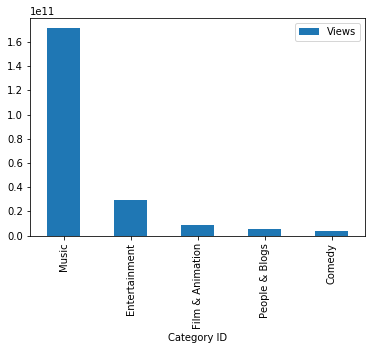

In [109]:
Top_5_CategoryID_Views=Views_CategoryID_df.sort_values("Views", ascending=False)
Top5Viewed=Top_5_CategoryID_Views.head(5)
Top5Viewed
Top=Top5Viewed.plot.bar()
Top

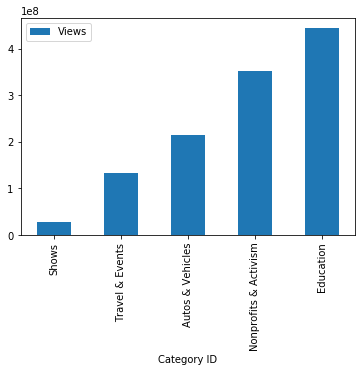

In [110]:
#sorted views in ascending order (lowest values at the top)
bottom_views_us=us_df.sort_values("Views")
#bottom 5 video views
bottom_5_views_us = bottom_views_us[:5]
bottom_5_views_us

#GB bottom
Bottom_5_CategoryID_Views=Views_CategoryID_df.sort_values("Views", ascending=True)
Bottom5Viewed=Bottom_5_CategoryID_Views.head(5)
Bottom5Viewed
Bottom5Viewed.plot.bar()

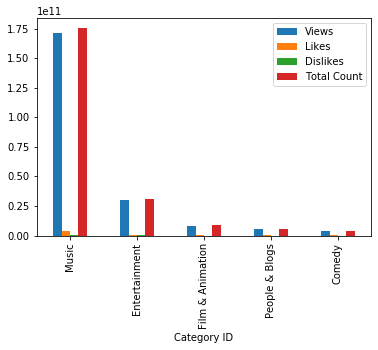

In [111]:
#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count')
All_CategoryID=Summary_gb.groupby('Category ID').sum()[["Views", 'Likes','Dislikes']]
All_CategoryID_df=pd.DataFrame(All_CategoryID)
All_CategoryID_df
Total=All_CategoryID_df.sum()
Total
# Find the total Sum of the Views, Likes, Dislikes, Comment Count 
Sum_All_CategoryID_df=All_CategoryID_df
Sum_All_CategoryID_df['Total Count']=All_CategoryID_df.sum(axis=1)
Sum_All_CategoryID_df

# Sort to find the Top 5
Top_5_CategoryID=Sum_All_CategoryID_df.sort_values("Total Count",ascending=False)
Top5_gb=Top_5_CategoryID.head(5)
Top5_gb

#Top5_gb.plot.bar()
Top5_gb.plot.bar()

In [112]:
#sort likes in descending order (largest values at the top)
top_likes_us=us_df.sort_values("Likes",ascending=False)
#top 5 video views
top_5_likes_us = top_likes_us[:5]
top_5_likes_us


#Sort to find the Bottom 5 GB
Bottom_5_CategoryID=Sum_All_CategoryID_df.sort_values("Total Count",ascending=True)
Bottom_5_CategoryID.head(5)
Summary_gb

Video ID Trending Date  \
0      Jw1Y-zhQURU      17.14.11   
1      3s1rvMFUweQ      17.14.11   
2      n1WpP7iowLc      17.14.11   
3      PUTEiSjKwJU      17.14.11   
4      rHwDegptbI4      17.14.11   
...            ...           ...   
38911  l884wKofd54      18.14.06   
38912  IP8k2xkhOdI      18.14.06   
38913  Il-an3K9pjg      18.14.06   
38914  -DRsfNObKIQ      18.14.06   
38915  4YFo4bdMO8Q      18.14.06   

                                                   Title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V...   
38913                 Anne-Marie - 2002 [Official Video]   
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                    Channel Title     Views   Likes  Dislikes  Comment Count  \
0                      John Lewis   7224515   55681     10247           9479   
1             Saturday Night Live   1053632   25561      2294           2757   
2                      EminemVEVO  17158579  787420     43420         125882   
3      Salford City Football Club     27833     193        12             37   
4                Cute Girl Videos      9815      30         2             30   
...                           ...       ...     ...       ...            ...   
38911         EnriqueIglesiasVEVO  25066952  268088     12783           9933   
38912             Jacob Sartorius   1492219   61998     13781          24330   
38913                  Anne-Marie  29641412  394830      8892          19988   
38914     Eurovision Song Contest  14317515  151870     45875          26766   
38915              SuperDuperKyle    607552   18271       274           1423   

           Category ID  
0        Howto & Style  
1        Entertainment  
2                Music  
3               Sports  
4      News & Politics  
...                ...  
38911            Music  
38912            Music  
38913            Music  
38914    Entertainment  
38915            Music  

[38916 rows x 9 columns]

In [113]:
#sort likes in ascending order (lowest values at the top)
bottom_likes_us=us_df.sort_values("Likes")
#bottom 5 video views
bottom_5_likes_us = bottom_likes_us[:5]
bottom_5_likes_us

Trending Date                                              Title  \
1490       17.21.11  Kelly Oubre Punches John Wall in the Lead duri...   
14869      18.29.01          Vince McMahon's Major Sports Announcement   
1868       17.23.11  Highlights of the EA predatory behavior announ...   
23516      18.13.03         GET READY WITH ME | Halo Beauty Launch Day   
16303      18.05.02                                         The Unsung   

             Channel Title     Category ID   Views  Likes  Dislikes  
1490          Rob Andretti          Sports    2197      0         2  
14869  Alpha Entertainment          Sports  132093      0         0  
1868             chris lee  People & Blogs  160012      0         0  
23516                 Tati   Howto & Style  928082      0         0  
16303           MassMutual       Education   18336      0         0

In [114]:
# Find top viewed Channels
channel_data_us = us_df.loc[:,("Channel Title", "Views", "Likes", "Dislikes")]
channel_data_us

Channel Title     Views   Likes  Dislikes
0                  CaseyNeistat    748374   57527      2966
1               LastWeekTonight   2418783   97185      6146
2                  Rudy Mancuso   3191434  146033      5339
3         Good Mythical Morning    343168   10172       666
4                      nigahiga   2095731  132235      1989
...                         ...       ...     ...       ...
40944             AaronsAnimals   1685609   38160      1385
40945                  zefrank1   1064798   60008       382
40946                Brad Mondo   1066451   48068      1032
40947  How It Should Have Ended   5660813  192957      2846
40948              Call of Duty  10306119  357079    212976

[40949 rows x 4 columns]

In [115]:
# sum the views, likes, and dislikes for each channel
topviewedchannel_us = channel_data_us.groupby("Channel Title").sum()["Views"]
toplikedchannel_us = channel_data_us.groupby("Channel Title").sum()["Likes"]
topdislikedchannel_us = channel_data_us.groupby("Channel Title").sum()["Dislikes"]

# create a dataframe of the total views, likes, and dislilkes of each channel
channel_summary_us = pd.DataFrame({"Total Views":topviewedchannel_us,
                               "Total Likes":toplikedchannel_us,
                               "Total Dislikes":topdislikedchannel_us})

# print dataframe
channel_summary_us

Total Views  Total Likes  Total Dislikes
Channel Title                                                   
12 News                      177970          352              90
1MILLION Dance Studio      20959169      1399898           15030
1theK (원더케이)               57375949      3663362           63329
20th Century Fox         1082872611     24419452          488761
2CELLOS                      432186        22900             245
...                             ...          ...             ...
ワーナー ブラザース 公式チャンネル          7389323       154962            6128
圧倒的不審者の極み!                 11417717       157447           12315
杰威爾音樂 JVR Music           400530463      3400678          229439
郭韋辰                           26964           99               2
영국남자 Korean Englishman      5963784       147154            2579

[2207 rows x 3 columns]

In [116]:
#sort channel views in descending order (largest values at the top)
topchannelviews_us = channel_summary_us.sort_values("Total Views", ascending=False)
#top 5 viewed channels
top_5_viewedchannels_us = topchannelviews_us[:5]
top_5_viewedchannels_us

Total Views  Total Likes  Total Dislikes
Channel Title                                                 
ChildishGambinoVEVO    3758488765     96700818         6054434
ibighit                2235906679    199247121         3467306
Dude Perfect           1870085178     60275557         1501477
Marvel Entertainment   1808998971     55873344         1031250
ArianaGrandeVevo       1576959172     52170970         1931230

In [117]:
#sort channel views in ascending order (lowest values at the top)
lowchannelviews_us = channel_summary_us.sort_values("Total Views")
#bottom 5 viewed channels
bottom_5_viewedchannels_us = lowchannelviews_us[:5]
bottom_5_viewedchannels_us

Total Views  Total Likes  Total Dislikes
Channel Title                                                                 
90s Commercials                               773            2               0
GoDucksdotcom                                1391           20               4
OjO Commuter Scooter by OjO Electric         1706            6               1
Total Combat                                 1722           17               3
CHauserable                                  1807            6               3

In [118]:
#sort channel likes in descending order (largest values at the top)
topchannellikes_us = channel_summary_us.sort_values("Total Likes", ascending=False)
#top 5 liked channels
top_5_likedchannels_us = topchannellikes_us[:5]
top_5_likedchannels_us

Total Views  Total Likes  Total Dislikes
Channel Title                                                 
ibighit                2235906679    199247121         3467306
ChildishGambinoVEVO    3758488765     96700818         6054434
Dude Perfect           1870085178     60275557         1501477
Marvel Entertainment   1808998971     55873344         1031250
ArianaGrandeVevo       1576959172     52170970         1931230

In [119]:
#sort channel dislikes in descending order (largest values at the top)
topchanneldislikes_us = channel_summary_us.sort_values("Total Dislikes", ascending=False)
#top 5 disliked channels
top_5_dislikedchannels_us = topchanneldislikes_us[:5]
top_5_dislikedchannels_us

Total Views  Total Likes  Total Dislikes
Channel Title                                                
Logan Paul Vlogs       484356303     31545290        13847251
YouTube Spotlight      791388476     20173324        10924092
ChildishGambinoVEVO   3758488765     96700818         6054434
Call of Duty           315404711     11553594         5644083
ibighit               2235906679    199247121         3467306

In [120]:
#Findiing the Sum of Likes 
Likes_Category_US=us_df.groupby('Category ID').sum()["Likes"]
Likes_Category_US_df=pd.DataFrame(Likes_Category_US)
Likes_Category_US_df

Likes
Category ID                      
Autos & Vehicles          4245656
Comedy                  216346746
Education                49257772
Entertainment           530516491
Film & Animation        165997476
Gaming                   69038284
Howto & Style           162880075
Music                  1416838584
News & Politics          18151033
Nonprofits & Activism    14815646
People & Blogs          186615999
Pets & Animals           19370702
Science & Technology     82532638
Shows                     1082639
Sports                   98621211
Travel & Events           4836246

In [121]:
#Finding the Sum of Dislikes 
Dislikes_Category_US=us_df.groupby('Category ID').sum()["Dislikes"]
Dislikes_Category_US_df=pd.DataFrame(Dislikes_Category_US)
Dislikes_Category_US_df

Dislikes
Category ID                    
Autos & Vehicles         243010
Comedy                  7230391
Education               1351972
Entertainment          42987663
Film & Animation        6075148
Gaming                  9184466
Howto & Style           5473899
Music                  51179008
News & Politics         4180049
Nonprofits & Activism   3310381
People & Blogs         10187901
Pets & Animals           527379
Science & Technology    4548402
Shows                     24508
Sports                  5133551
Travel & Events          340427

In [122]:
#Finding the Sum of Views 
Views_Category_US=us_df.groupby('Category ID').sum()["Views"]
Views_Category_US_df=pd.DataFrame(Views_Category_US)
Views_Category_US_df

Views
Category ID                       
Autos & Vehicles         520690717
Comedy                  5117426208
Education               1180629990
Entertainment          20604388195
Film & Animation        7284156721
Gaming                  2141218625
Howto & Style           4078545064
Music                  40132892190
News & Politics         1473765704
Nonprofits & Activism    168941392
People & Blogs          4917191726
Pets & Animals           764651989
Science & Technology    3487756816
Shows                     51501058
Sports                  4404456673
Travel & Events          343557084

In [123]:
Top_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=False)
Top5Viewed_US=Top_5_CategoryID_Views_US.head(5)
Top5Viewed_US

Views
Category ID                  
Music             40132892190
Entertainment     20604388195
Film & Animation   7284156721
Comedy             5117426208
People & Blogs     4917191726

In [124]:
Bottom_5_CategoryID_Views_US=Views_Category_US_df.sort_values("Views", ascending=True)
Bottom5Viewed_US=Bottom_5_CategoryID_Views_US.head(5)
Bottom5Viewed_US

Views
Category ID                     
Shows                   51501058
Nonprofits & Activism  168941392
Travel & Events        343557084
Autos & Vehicles       520690717
Pets & Animals         764651989

In [125]:
#Finding the Sum of (Views, Likes, Dislikes, 'Comment Count')
All_CategoryID_US=us_df.groupby('Category ID').sum()[["Views", 'Likes','Dislikes']]
All_CategoryID_US_df=pd.DataFrame(All_CategoryID_US)
All_CategoryID_US_df

Views       Likes  Dislikes
Category ID                                             
Autos & Vehicles         520690717     4245656    243010
Comedy                  5117426208   216346746   7230391
Education               1180629990    49257772   1351972
Entertainment          20604388195   530516491  42987663
Film & Animation        7284156721   165997476   6075148
Gaming                  2141218625    69038284   9184466
Howto & Style           4078545064   162880075   5473899
Music                  40132892190  1416838584  51179008
News & Politics         1473765704    18151033   4180049
Nonprofits & Activism    168941392    14815646   3310381
People & Blogs          4917191726   186615999  10187901
Pets & Animals           764651989    19370702    527379
Science & Technology    3487756816    82532638   4548402
Shows                     51501058     1082639     24508
Sports                  4404456673    98621211   5133551
Travel & Events          343557084     4836246    340427

In [126]:
Total_US=All_CategoryID_US_df.sum()
Total_US

Views       96671770152
Likes        3041147198
Dislikes      151978155
dtype: int64

In [127]:
TitleID_gb=Summary_gb[['Title', "Channel Title", "Views", 'Likes', 'Dislikes', 'Category ID']]
TitleID_gb

Title  \
0          John Lewis Christmas Ad 2017 - #MozTheMonster   
1              Taylor Swift: …Ready for It? (Live) - SNL   
2             Eminem - Walk On Water (Audio) ft. Beyoncé   
3      Goals from Salford City vs Class of 92 and Fri...   
4      Dashcam captures truck's near miss with child ...   
...                                                  ...   
38911  Enrique Iglesias - MOVE TO MIAMI (Official Vid...   
38912  Jacob Sartorius - Up With It (Official Music V...   
38913                 Anne-Marie - 2002 [Official Video]   
38914  Eleni Foureira - Fuego - Cyprus - LIVE - First...   
38915  KYLE - Ikuyo feat.  2 Chainz & Sophia Black [A...   

                    Channel Title     Views   Likes  Dislikes      Category ID  
0                      John Lewis   7224515   55681     10247    Howto & Style  
1             Saturday Night Live   1053632   25561      2294    Entertainment  
2                      EminemVEVO  17158579  787420     43420            Music  
3      Salford City Football Club     27833     193        12           Sports  
4                Cute Girl Videos      9815      30         2  News & Politics  
...                           ...       ...     ...       ...              ...  
38911         EnriqueIglesiasVEVO  25066952  268088     12783            Music  
38912             Jacob Sartorius   1492219   61998     13781            Music  
38913                  Anne-Marie  29641412  394830      8892            Music  
38914     Eurovision Song Contest  14317515  151870     45875    Entertainment  
38915              SuperDuperKyle    607552   18271       274            Music  

[38916 rows x 6 columns]

In [128]:
Top5_Views_Title=TitleID_gb.sort_values('Views', ascending=False)
Top5_Views_Title.head(5)

Title Channel Title  \
28412  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...    NickyJamTV   
28212  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...    NickyJamTV   
28008  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...    NickyJamTV   
27811  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...    NickyJamTV   
27615  Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...    NickyJamTV   

           Views    Likes  Dislikes Category ID  
28412  424538912  2818771    149275       Music  
28212  413586699  2768654    145643       Music  
28008  402650804  2719005    142006       Music  
27811  392036878  2670723    138334       Music  
27615  382401497  2618320    134625       Music

In [129]:
Bottom5_Views_Title_gb=TitleID_gb.sort_values('Views', ascending=True)
Bottom5_Views_Title_gb.head(5)

Title     Channel Title  \
3477  Mountain Bikers Worried About Military Land Be...  That's Surrey TV   
3701  Mountain Bikers Worried About Military Land Be...  That's Surrey TV   
3908  Mountain Bikers Worried About Military Land Be...  That's Surrey TV   
4113  Mountain Bikers Worried About Military Land Be...  That's Surrey TV   
4342  Mountain Bikers Worried About Military Land Be...  That's Surrey TV   

      Views  Likes  Dislikes      Category ID  
3477    851     12         0  News & Politics  
3701    890     13         0  News & Politics  
3908    922     13         0  News & Politics  
4113    937     13         0  News & Politics  
4342    972     13         0  News & Politics

In [130]:
#Top 5 Like Title 
Top5_Like_Title_gb=TitleID_gb.sort_values('Likes', ascending=False)
Top5_Like_Title_gb.head(5)

Title        Channel Title  \
36638                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
36468                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
36288                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
36119                BTS (방탄소년단) 'FAKE LOVE' Official MV              ibighit   
38401  Childish Gambino - This Is America (Official V...  ChildishGambinoVEVO   

           Views    Likes  Dislikes Category ID  
36638  123010920  5613827    206892       Music  
36468  121219886  5595203    205565       Music  
36288  115664850  5530568    200995       Music  
36119  111882133  5486349    197638       Music  
38401  259721696  5444541    379862       Music

In [131]:
Bottom5_Like_Title_gb=TitleID_gb.sort_values('Dislikes', ascending=False)
Bottom5_Like_Title_gb.head(5)

Title     Channel Title     Views    Likes  Dislikes    Category ID
12784  So Sorry.  Logan Paul Vlogs  45349447  1572111   1944971  Entertainment
12559  So Sorry.  Logan Paul Vlogs  44815907  1559608   1928677  Entertainment
12343  So Sorry.  Logan Paul Vlogs  44266614  1547034   1911836  Entertainment
12134  So Sorry.  Logan Paul Vlogs  43596655  1532248   1890743  Entertainment
11928  So Sorry.  Logan Paul Vlogs  42829793  1515888   1868756  Entertainment

In [132]:
#Top 5 views per category
CA_Cateogry_views=CA_Sum_All_CategoryID_df.sort_values("Views",ascending=False)
#saving as new variable
CA_Cateogry_views_df=CA_Cateogry_views.head(5)
CA_Cateogry_views_df

Views      Likes  Dislikes  Comment Count  Total Count
title_list                                                                  
Entertainment   13671215509  387245433  25791583       55313036  14139565561
Music           13179850194  564447530  22098190       52435252  13818831166
Comedy           3708438785  196046674   5372515       19638776   3929496750
People & Blogs   3228227926  105388564   9480796       16818201   3359915487
Sports           2997652188   59449419   3286369        7661342   3068049318

In [133]:
#Bottom 5 views per category
CA_bot_Cateogry_views =CA_Sum_All_CategoryID_df.sort_values("Views")
#saving as new variable
CA_bot_Cateogry_views_df=CA_bot_Cateogry_views.head(5)
CA_bot_Cateogry_views_df

Views     Likes  Dislikes  Comment Count  \
title_list                                                            
Movies                  17120490    252905     12280          13979   
Shows                   71549508    589263    120436          77243   
Nonprofits & Activism  115601623  10242613   2325807        3222541   
Travel & Events        143746952   3750914    129861         609953   
Autos & Vehicles       200066074   4732114    197776        1016188   

                       Total Count  
title_list                          
Movies                    17399654  
Shows                     72336450  
Nonprofits & Activism    131392584  
Travel & Events          148237680  
Autos & Vehicles         206012152

In [134]:
#Top 5 liked per category
CA_Cateogry_likes = CA_Sum_All_CategoryID_df.sort_values("Likes",ascending=False)
#saving as new variable
CA_Cateogry_likes_df=CA_Cateogry_likes.head(5)
CA_Cateogry_likes_df

Views      Likes  Dislikes  Comment Count  Total Count
title_list                                                                    
Music             13179850194  564447530  22098190       52435252  13818831166
Entertainment     13671215509  387245433  25791583       55313036  14139565561
Comedy             3708438785  196046674   5372515       19638776   3929496750
People & Blogs     3228227926  105388564   9480796       16818201   3359915487
Film & Animation   2939060844   77802003   3111259       10086573   3030060679

In [135]:
#Top 5 disliked per category
CA_Cateogry_Dislikes = CA_Sum_All_CategoryID_df.sort_values("Dislikes",ascending=False)
#saving as new variable
CA_Cateogry_Dislikes_df=CA_Cateogry_Dislikes.head(5)
CA_Cateogry_Dislikes_df

Views      Likes  Dislikes  Comment Count  Total Count
title_list                                                                  
Entertainment   13671215509  387245433  25791583       55313036  14139565561
Music           13179850194  564447530  22098190       52435252  13818831166
People & Blogs   3228227926  105388564   9480796       16818201   3359915487
Comedy           3708438785  196046674   5372515       19638776   3929496750
Sports           2997652188   59449419   3286369        7661342   3068049318